In [1]:
n = (11 + 4) % 5 + 1
print(f"Варіант №{n}")

Варіант №1


In [2]:
import numpy as np
import pandas as pd
data_frame = pd.read_csv('./NationalNames.csv')

In [3]:
# виведення перших 8 рядків даних 
data_frame.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


In [4]:
# виведення останніх 8 рядків даних
data_frame.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [5]:
# виведення даних про назви колонок
data_frame.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

In [6]:
# виведення кількості унікальних імен
data_frame['Name'].unique().shape[0]

93889

In [7]:
# кількість унікальних імен в кожному році (відображено перші 8)
df_1 = pd.DataFrame(data_frame[['Year', 'Name']].groupby('Year')['Name'].nunique())
df_1.head(8)

,Name
Year,
1880,1889
1881,1830
1882,2012
1883,1962
1884,2158
1885,2139
1886,2225
1887,2215


In [8]:
# рік з найбільшою кількістю унікальних імен
df_2 = pd.DataFrame(df_1[df_1['Name'] == df_1.values.max()])
df_2

,Name
Year,
2008,32488


In [9]:
# найпопулярніше ім'я в 2008
data_frame[data_frame['Year'] == 2008].sort_values('Count', ascending=False).iloc[0].values[1]

'Jacob'

In [10]:
# рік, коли найпопулрнішим жіночим ім'ям було 'Jacob'
data_frame[(data_frame['Name'] == 'Jacob') & (data_frame['Gender'] == 'F')].sort_values('Count').tail(1)

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


In [11]:
# функція пошуку гендерно-нейтральних імен за роком
def gnn_year(year, df):
    male = df[(df['Gender'] == 'M') & (df['Year'] == year)]['Name'].unique()
    female = df[(df['Gender'] == 'F') & (df['Year'] == year)]['Name'].unique()
    return np.intersect1d(female, male)


In [12]:
# гендерно нейтральні імена
result_df = pd.DataFrame({'Year': [], 'Gender_neutral_names' : []})
for i in range (1880, 2015):
    dup = gnn_year(i, data_frame)
    result_df.loc[len(result_df)] = [i, int(dup.shape[0])]

result_df.set_index('Year').sort_values('Gender_neutral_names').tail(1)

,Gender_neutral_names
Year,
2008,2557


In [13]:
# загальна кількість народжень за рік
df_birth = pd.DataFrame(data_frame[['Year', 'Count']].groupby('Year').agg({'Count':'sum'}))
df_birth.head(5)

,Count
Year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467


In [14]:
# рік з найбільшою народжуваністю
df_birth.sort_values('Count').index[-1]

1957

In [15]:
# кількість народжених дівчат та хлопців
df_pivot = pd.pivot_table(data_frame, values='Count', index='Year', columns='Gender',
                          aggfunc='sum')
df_pivot.head(5)

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


In [16]:
# кількість років, коли дівчат народилось більше
df_pivot[df_pivot['F'] > df_pivot['M']].shape[0]

54

In [17]:
# кількість хлопців з ім'ям 'Barbara'
data_frame[(data_frame['Name'] == 'Barbara') & (data_frame['Gender'] == 'M')]['Count'].sum()

4139

In [18]:
# тривалість спостереження
start_y = data_frame['Year'].iloc[0]
end_y = data_frame['Year'].iloc[-1] + 1
print(f"Спостереження проводилось {end_y - start_y} років")

Спостереження проводилось 135 років


In [19]:
# найпопулярніші гендерно-нейтральні імена
popular = gnn_year(1880, data_frame)

for i in range(1881, 2015):
    current_gn = gnn_year(i, data_frame)
    popular = np.intersect1d(popular, current_gn)

pd.DataFrame(popular).sort_values(0)

,0
0,Francis
1,James
2,Jean
3,Jesse
4,Jessie
5,John
6,Johnnie
7,Joseph
8,Lee
9,Leslie


In [20]:
# найпопулярніше серед непопуярних імен (24)
popularity = data_frame[['Name', 'Count']].groupby('Name').agg({'Count' : 'sum'})
popularity.loc['Celester']

Count    401
Name: Celester, dtype: int64

<Axes: xlabel='Year'>

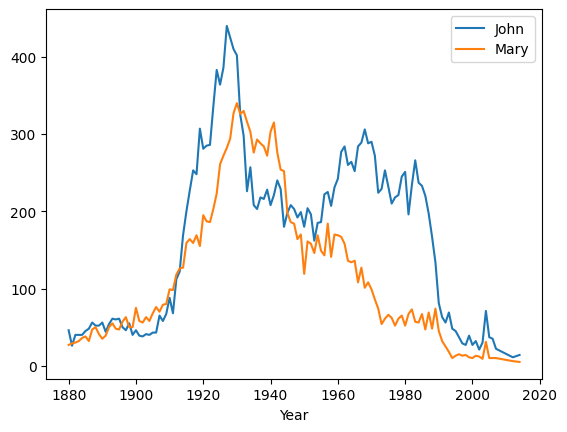

In [26]:
# графік розподілення жінок John та чоловіків Mary
def name_count(name, gender, df):
    return df[(df['Name'] == name) & (df['Gender'] == gender)][['Year', 'Count']].rename(columns={'Count' : name})

f_john = name_count('John', 'F', data_frame)
m_mary = name_count('Mary', 'M', data_frame)
graph = f_john.merge(m_mary, on='Year').set_index('Year')
graph.plot()